In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_csv('/work/retail_data.csv')
retail

,id,purchase_date,product_category,amount,customer_id
0,230,2025-05-11,Clothing,181.73,1034
1,630,2025-06-19,Electronics,442.32,1020
2,867,2025-02-16,Home & Kitchen,263.12,1049
3,763,2025-02-13,Home & Kitchen,434.05,1058
4,758,2025-04-15,Clothing,489.6,1077
...,...,...,...,...,...
815,494,2025-04-25,Clothing,61.89,1065
816,555,2025-03-04,Sports,74.31,1061
817,491,2025-03-14,Toys,33.54,1096
818,13,2025-06-19,Electronics,371.75,1070


In [5]:
retail = retail.rename(columns={"customer_id": "transaction_id"})
retail = retail.rename(columns={"id": "customer_id"})

In [6]:
retail

,customer_id,purchase_date,product_category,amount,transaction_id
0,230,2025-05-11,Clothing,181.73,1034
1,630,2025-06-19,Electronics,442.32,1020
2,867,2025-02-16,Home & Kitchen,263.12,1049
3,763,2025-02-13,Home & Kitchen,434.05,1058
4,758,2025-04-15,Clothing,489.6,1077
...,...,...,...,...,...
815,494,2025-04-25,Clothing,61.89,1065
816,555,2025-03-04,Sports,74.31,1061
817,491,2025-03-14,Toys,33.54,1096
818,13,2025-06-19,Electronics,371.75,1070


In [7]:
duplicates_transaction = retail[retail["transaction_id"].duplicated(keep=False)]
duplicates_transaction

,customer_id,purchase_date,product_category,amount,transaction_id
0,230,2025-05-11,Clothing,181.73,1034
1,630,2025-06-19,Electronics,442.32,1020
2,867,2025-02-16,Home & Kitchen,263.12,1049
3,763,2025-02-13,Home & Kitchen,434.05,1058
4,758,2025-04-15,Clothing,489.6,1077
...,...,...,...,...,...
815,494,2025-04-25,Clothing,61.89,1065
816,555,2025-03-04,Sports,74.31,1061
817,491,2025-03-14,Toys,33.54,1096
818,13,2025-06-19,Electronics,371.75,1070


In [8]:
retail.shape

(820, 5)

In [9]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       820 non-null    int64 
 1   purchase_date     796 non-null    object
 2   product_category  796 non-null    object
 3   amount            796 non-null    object
 4   transaction_id    820 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 32.2+ KB


In [10]:
retail.describe()

,customer_id,transaction_id
count,820.000000,820.000000
mean,500.884146,1049.423171
std,290.138248,27.956100
min,1.000000,1000.000000
25%,250.750000,1026.000000
50%,499.000000,1050.000000
75%,752.250000,1073.000000
max,1000.000000,1099.000000


In [11]:
# Ordenar los IDs y calcular las diferencias entre consecutivos
retail_sorted = retail.sort_values("customer_id")
diffs = retail_sorted["customer_id"].diff().dropna()

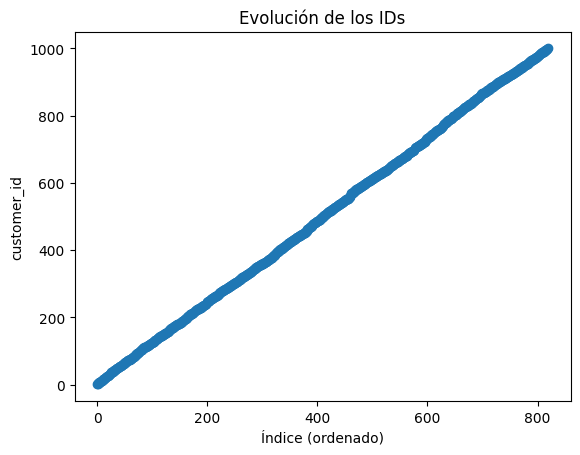

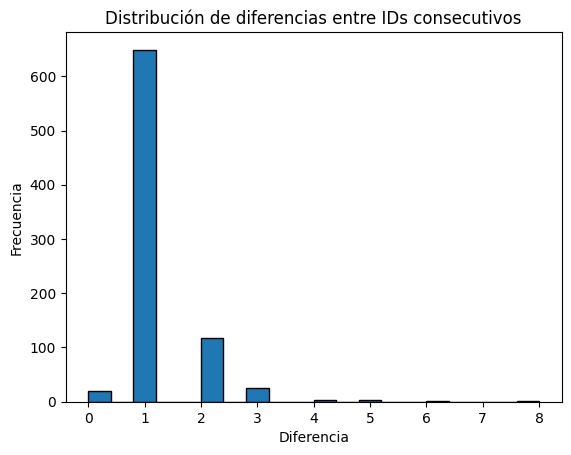

In [12]:
plt.plot(retail_sorted["customer_id"].values, marker="o")
plt.title("Evolución de los IDs")
plt.xlabel("Índice (ordenado)")
plt.ylabel("customer_id")
plt.show()

# --- Gráfica 2: Histograma de diferencias ---
plt.hist(diffs, bins=20, edgecolor="black")
plt.title("Distribución de diferencias entre IDs consecutivos")
plt.xlabel("Diferencia")
plt.ylabel("Frecuencia")
plt.show()


In [13]:
# Ordenar los IDs y calcular las diferencias entre consecutivos
retail_sorted = retail.sort_values("transaction_id")
diffs = retail_sorted["transaction_id"].diff().dropna()

24 valores no se pudieron convertir


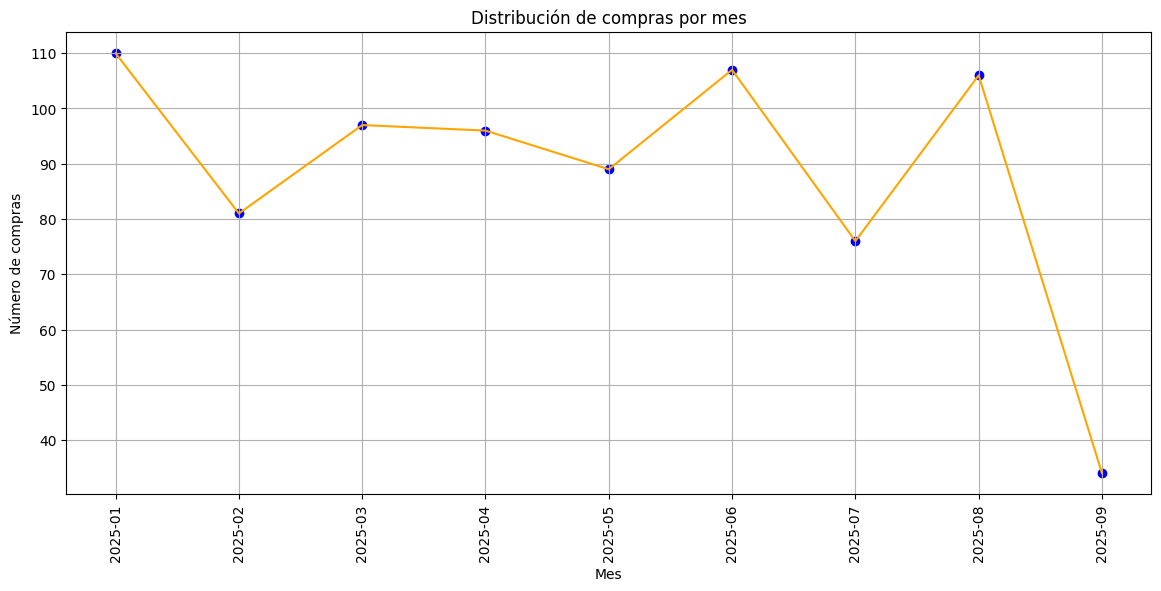

In [15]:
# Convertir a datetime
retail["purchase_date_dt"] = pd.to_datetime(retail["purchase_date"], errors="coerce")

# Ver si hay valores nulos tras la conversión
print(retail["purchase_date_dt"].isna().sum(), "valores no se pudieron convertir")

# Agrupar por año-mes
compras_mes = retail["purchase_date_dt"].dt.to_period("M").value_counts().sort_index()

# Convertir índices a formato string para el eje x
meses = compras_mes.index.astype(str)
valores = compras_mes.values

# Graficar scatter con líneas
plt.figure(figsize=(14,6))
plt.scatter(meses, valores, color='blue')    
plt.plot(meses, valores, color='orange')    

plt.title("Distribución de compras por mes")
plt.xlabel("Mes")
plt.ylabel("Número de compras")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [16]:
print(retail["purchase_date"].head(10))

0    2025-05-11
1    2025-06-19
2    2025-02-16
3    2025-02-13
4    2025-04-15
5           NaN
6    2025-08-27
7    2025-04-14
8    2025-06-15
9    2025-08-22
Name: purchase_date, dtype: object


In [17]:
# Porcentaje de nulos
nulls_pct = (retail.isnull().mean()*100).sort_values(ascending=False)
print(nulls_pct)

purchase_date       2.926829
product_category    2.926829
purchase_date_dt    2.926829
amount              2.926829
customer_id         0.000000
transaction_id      0.000000
dtype: float64


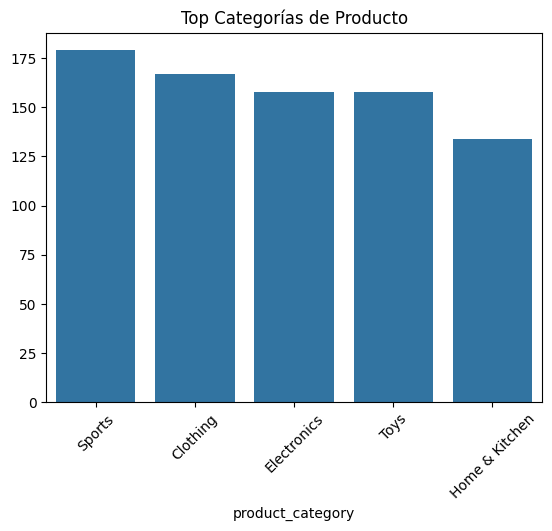

In [18]:
top_productos = retail["product_category"].value_counts().head(10)
sns.barplot(x=top_productos.index, y=top_productos.values)
plt.title("Top Categorías de Producto")
plt.xticks(rotation=45)
plt.show()

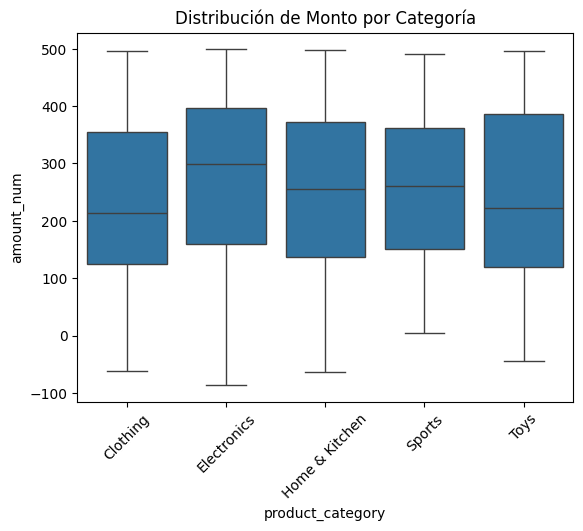

In [19]:
# Convertir a numérico dentro del DataFrame
retail["amount_num"] = pd.to_numeric(retail["amount"], errors="coerce")

# Graficar usando la nueva columna numérica
sns.boxplot(x="product_category", y="amount_num", data=retail)
plt.xticks(rotation=45)
plt.title("Distribución de Monto por Categoría")
plt.show()

In [20]:
amount_num = pd.to_numeric(retail["amount"], errors="coerce")

# Resumen solo para montos positivos
print("Resumen final de montos (positivos):")
print(amount_num[amount_num > 0].describe())

Resumen final de montos (positivos):
count    776.000000
mean     254.836946
std      144.140143
min        5.010000
25%      141.452500
50%      253.420000
75%      380.957500
max      498.920000
Name: amount, dtype: float64


In [21]:
print(retail["product_category"].value_counts(dropna=False))

product_category
Sports            179
Clothing          167
Electronics       158
Toys              158
Home & Kitchen    134
NaN                24
Name: count, dtype: int64


In [22]:
# Total de filas
total = len(retail)

# Tabla de frecuencias
customer_freq = retail["customer_id"].value_counts().reset_index()
customer_freq.columns = ["customer_id", "count"]
customer_freq["percentage"] = (customer_freq["count"] / total) * 100

# Filtrar los que están duplicados (más de 1 aparición)
duplicates = customer_freq[customer_freq["count"] > 1]

print(duplicates)

    customer_id  count  percentage
0           877      2    0.243902
1           181      2    0.243902
2           693      2    0.243902
3           886      2    0.243902
4           210      2    0.243902
5            57      2    0.243902
6            74      2    0.243902
7           113      2    0.243902
8           486      2    0.243902
9           158      2    0.243902
10          104      2    0.243902
11          307      2    0.243902
12          867      2    0.243902
13          611      2    0.243902
14          834      2    0.243902
15          285      2    0.243902
16          360      2    0.243902
17          553      2    0.243902
18          226      2    0.243902
19          663      2    0.243902


In [23]:
# Total de filas
total = len(retail)

# Tabla de frecuencias
customer_freq = retail["transaction_id"].value_counts().reset_index()
customer_freq.columns = ["transaction_id", "count"]
customer_freq["percentage"] = (customer_freq["count"] / total) * 100

# Filtrar los que están duplicados (más de 1 aparición)
duplicates = customer_freq[customer_freq["count"] > 1]

print(duplicates)

    transaction_id  count  percentage
0             1060     16    1.951220
1             1078     16    1.951220
2             1058     16    1.951220
3             1028     15    1.829268
4             1061     14    1.707317
..             ...    ...         ...
95            1043      4    0.487805
96            1071      3    0.365854
97            1030      3    0.365854
98            1069      3    0.365854
99            1051      2    0.243902

[100 rows x 3 columns]


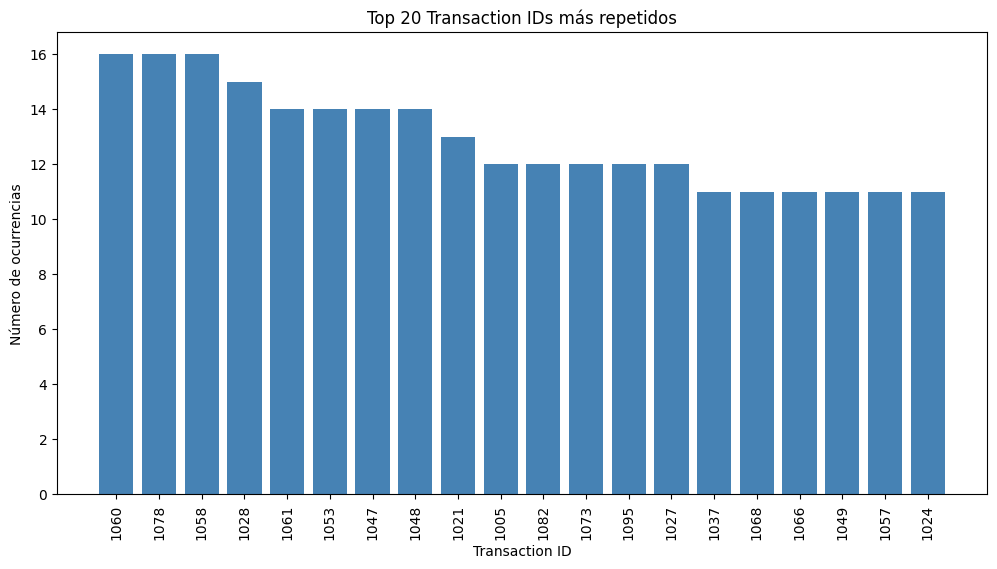

In [24]:
# Tomamos el top 20 de duplicados
top_duplicates = duplicates.head(20)

plt.figure(figsize=(12,6))
plt.bar(top_duplicates["transaction_id"].astype(str), top_duplicates["count"], color="steelblue")
plt.xticks(rotation=90)
plt.title("Top 20 Transaction IDs más repetidos")
plt.xlabel("Transaction ID")
plt.ylabel("Número de ocurrencias")
plt.show()

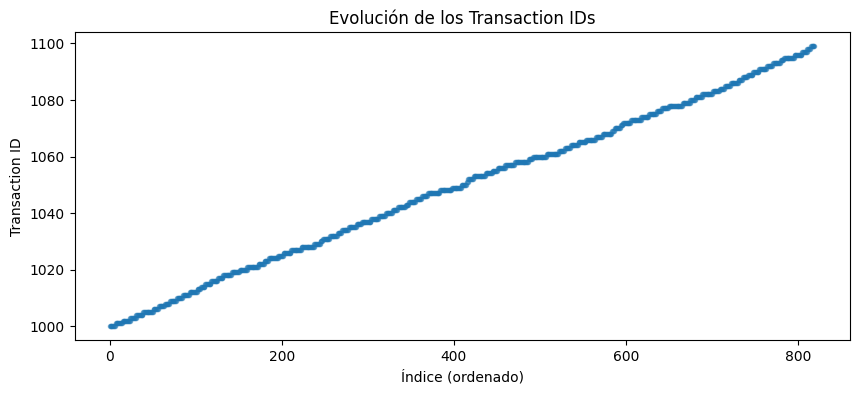

In [25]:
# Ordenar por transaction_id
sorted_ids = retail["transaction_id"].sort_values().reset_index(drop=True)

plt.figure(figsize=(10,4))
plt.plot(sorted_ids.index, sorted_ids, marker=".", linestyle="None", alpha=0.5)
plt.title("Evolución de los Transaction IDs")
plt.xlabel("Índice (ordenado)")
plt.ylabel("Transaction ID")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=171bad0a-62a2-42cc-9180-d14c0a1c4c1a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>